# <span style="color:green">Application of Machine Learning Techniques in Predicting Properties of Stainless Steel</span>


# 1. Import the libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data=pd.read_csv('D:/Thesis/thesis1.csv')
pd.set_option('display.max_columns', None)


In [242]:
Data.head()

,Condition,Finish,End Date,Work Center,Coil CutInst,O/P BATCH,MATERIAL CODE,Coil No.,Grade,Thk (mm),ID/OD,Sample thk (mm),YS (MPa),UTS (MPa),El% on 50mm GL,Hardness (HRB),CRAP at,C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,N2 (ppm),B%,Al%,Pb (ppm),Sn (pppm),Nb%,Co%,H(ppm),MF,Quality Plan,Origin,Quality Plan.1,Cu+Ni,Classification
0,CR,BA,04.04.2018,CRD_HB2,JSSL MTA 0.88MM+/-0.02 - P & T FOR HBA,2000993856,CRC-J09-BA-W,J404660,JT,0.88,ID,0.93,411,710.0,16,NaN,HBA2,0.112,9.95,0.006,0.057,0.30,0.45,14.36,0.45,0.07,1550,0.0016,-,55,56,0,0,7.2,0.13,QA/TP 16 (AMD 17),Jajpur,QA/TP-16 (AMD 17),0.90,TYPE-1
1,CR,BA,04.04.2018,CRD_HB3,JSSL MTA 0.88MM+/-0.02 - P & T FOR HBA,2000993244,CRC-J09-BA-W,256771,JT,0.88,ID,1.34,451,834.0,31,NaN,HBA3,0.112,10.08,0.006,0.060,0.32,0.42,14.46,0.50,0.09,1580,0.0019,-,79,98,0,0.041,4.5,0.4,QAD/MASTER QP/01 REV.-09,Hisar,QAD/MASTER QP/01 REV.-09,0.92,TYPE-1
2,CR,BA,04.04.2018,CRD_HB3,JSSL MTA 0.88MM+/-0.02 - P & T FOR HBA,2000993245,CRC-J09-BA-W,J405343,JT,0.88,ID,0.88,417,852.0,21,NaN,HBA3,0.112,10.01,0.007,0.057,0.34,0.47,14.14,0.45,0.07,1550,0.0019,-,54,61,0,0,7.3,0.21,QA/TP 16 (AMD 17),Jajpur,QA/TP-16 (AMD 17),0.92,TYPE-1
3,CR,BA,07.04.2018,CRD_HB3,JSSL MTA 1.45MM+/-0.04 - P & T FOR HBA,2000996149,CRC-J09-BA-W,J408272,JT,1.45,ID,1.63,410,884.0,31,NaN,HBA3,0.128,10.00,0.005,0.064,0.41,0.47,14.02,0.47,0.09,1600,0.002,-,50,62,0,0,7.2,0.19,QA/TP 16 (AMD 17),Jajpur,QA/TP-16 (AMD 17),0.94,TYPE-1
4,CR,BA,08.04.2018,CRD_HB3,JSSL MTA 1.45MM+/-0.04 - P & T FOR HBA,2000996490,CRC-J09-BA-W,260876,JT,1.45,ID,1.67,437,903.0,31,NaN,HBA3,0.108,10.04,0.007,0.073,0.34,0.46,14.26,0.51,0.06,1669,0.0016,-,79,130,0,0.05,5.66,0.38,QAD/MASTER QP/01 REV-10,Hisar,QAD/MASTER QP/01 REV-10,0.97,TYPE-1


# 2.Exploratory Data Analysis

In [243]:
Data.describe()

,O/P BATCH,Sample thk (mm),YS (MPa),UTS (MPa),Hardness (HRB),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,N2 (ppm),Cu+Ni
count,2.863000e+03,2863.000000,2863.000000,2859.000000,1.0,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000,2863.000000
mean,2.001574e+09,0.917076,427.785540,852.404337,98.0,0.104707,9.505414,0.005537,0.062244,0.387827,0.890978,15.235187,1.466560,0.079141,1646.344394,2.357538
std,1.787813e+05,0.419950,30.558283,83.677504,NaN,0.010147,0.786912,0.001736,0.008797,0.090456,0.466470,0.755400,0.651912,0.116964,107.916205,1.031929
min,2.000993e+09,0.260000,344.000000,515.000000,98.0,0.084000,8.070000,0.001000,0.008000,0.180000,0.400000,13.250000,0.410000,0.000000,0.000000,0.850000
25%,2.001533e+09,0.610000,408.000000,804.000000,98.0,0.095000,8.520000,0.005000,0.056000,0.320000,0.500000,14.440000,0.680000,0.040000,1570.000000,1.160000
50%,2.001621e+09,0.810000,423.000000,831.000000,98.0,0.106000,9.930000,0.006000,0.061000,0.380000,0.680000,15.300000,1.940000,0.060000,1630.000000,2.580000
75%,2.001658e+09,1.190000,440.000000,880.000000,98.0,0.112000,10.070000,0.007000,0.068000,0.440000,1.520000,16.070000,2.020000,0.100000,1720.000000,3.560000
max,2.001804e+09,3.170000,761.000000,1243.000000,98.0,0.163000,10.450000,0.040000,0.095000,0.690000,1.830000,16.550000,2.200000,3.000000,1979.000000,3.920000


In [244]:
Data.corr()

,O/P BATCH,Sample thk (mm),YS (MPa),UTS (MPa),Hardness (HRB),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,N2 (ppm),Cu+Ni
O/P BATCH,1.000000,-0.301517,-0.325670,0.028929,NaN,-0.119629,-0.071207,-0.219832,0.136529,0.177616,0.156642,0.234354,0.334963,-0.006104,-0.070966,0.282418
Sample thk (mm),-0.301517,1.000000,0.296378,0.270972,NaN,0.319489,0.265795,0.316825,-0.077088,-0.123301,-0.343585,-0.497041,-0.582462,-0.034218,-0.164323,-0.523278
YS (MPa),-0.325670,0.296378,1.000000,0.548105,NaN,0.319288,0.308375,0.093072,0.127979,0.197494,-0.338916,-0.369411,-0.389219,-0.022285,-0.107577,-0.399088
UTS (MPa),0.028929,0.270972,0.548105,1.000000,NaN,0.372828,0.391576,0.100394,0.198748,0.240324,-0.407585,-0.463429,-0.454840,-0.023370,-0.242266,-0.471531
Hardness (HRB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C%,-0.119629,0.319489,0.319288,0.372828,NaN,1.000000,0.821907,0.054874,0.430283,0.462077,-0.826701,-0.823704,-0.685615,-0.172598,-0.575271,-0.806830
Mn%,-0.071207,0.265795,0.308375,0.391576,NaN,0.821907,1.000000,0.022181,0.535936,0.566137,-0.959648,-0.846953,-0.641559,-0.169663,-0.697116,-0.839095
S%,-0.219832,0.316825,0.093072,0.100394,NaN,0.054874,0.022181,1.000000,-0.082697,-0.191954,-0.091833,-0.219680,-0.319462,0.005403,-0.002307,-0.243329
P%,0.136529,-0.077088,0.127979,0.198748,NaN,0.430283,0.535936,-0.082697,1.000000,0.408398,-0.477249,-0.351353,-0.172425,-0.087133,-0.410198,-0.324662
Si%,0.177616,-0.123301,0.197494,0.240324,NaN,0.462077,0.566137,-0.191954,0.408398,1.000000,-0.515166,-0.391272,-0.209959,-0.143626,-0.453191,-0.365513


<AxesSubplot:>

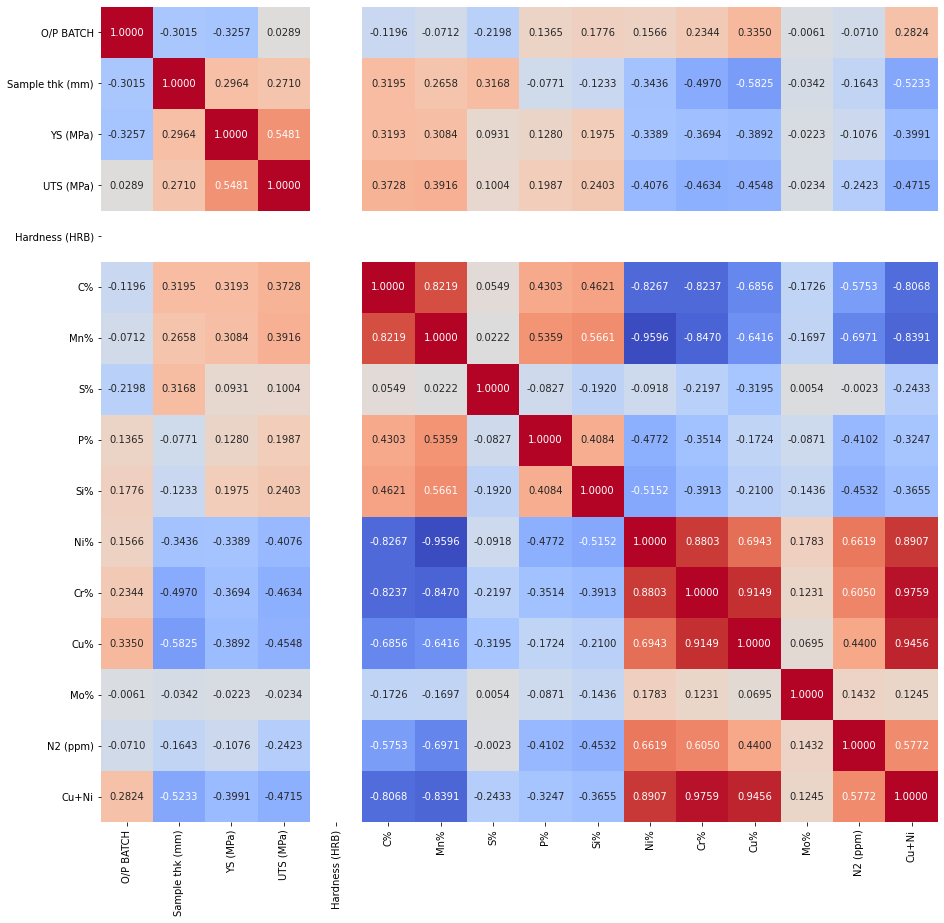

In [245]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(Data.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

#### Adding Grain Size to the dataset

In [246]:
conditions = [
    (Data['Grade'] == 'JT'),
    (Data['Grade'] == 'JSLU DD'),
    (Data['Grade']== 'JSLU SD'),(Data['Grade']== '204CU')
    ]

# create a list of the values we want to assign for each condition
values = [33,25,20,25]

# create a new column and use np.select to assign values to it using our lists as arguments
Data['Grain Size'] = np.select(conditions, values)


In [247]:
# df=Data.loc[Data['Grade'] != '204CU']
df=Data

In [248]:
df1=df.loc[df['Grade'] == '204CU']
df2=df.loc[df['Grade'] == 'JSLU SD']
df3=df.loc[df['Grade'] == 'JSLU DD']
df4=df.loc[df['Grade'] == 'JT']

In [249]:
df1.head()

,Condition,Finish,End Date,Work Center,Coil CutInst,O/P BATCH,MATERIAL CODE,Coil No.,Grade,Thk (mm),ID/OD,Sample thk (mm),YS (MPa),UTS (MPa),El% on 50mm GL,Hardness (HRB),CRAP at,C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,N2 (ppm),B%,Al%,Pb (ppm),Sn (pppm),Nb%,Co%,H(ppm),MF,Quality Plan,Origin,Quality Plan.1,Cu+Ni,Classification,Grain Size
656,CR,2B,09.11.2018,CRD_AP4,JSL LIFESTYLE LIMITED 0.76MM +/-0.02,2001175801,CRC-J02-2B-T5,277119,204CU,0.76,ID,0.80,413,809.0,56,NaN,AP4,0.087,8.24,0.008,0.045,0.47,1.59,16.14,2.09,0.12,1680,0.0012,-,80,90,-,0.055,-,3.8,QAD/MASTER QP/01 REV-10,Hisar,NaN,3.68,204Cu,25
657,CR,2B,09.11.2018,CRD_AP4,JSHL HOLLOWARE 1.20MM +/-0.036,2001175916,CRC-J02-2B-T6,277087,204CU,1.2,ID,1.28,507,862.0,45,NaN,AP4,0.086,8.11,0.008,0.056,0.29,1.58,16.12,2.05,0.13,1770,0.0016,-,73,104,-,0.047,-,3.1,QAD/MASTER QP/01 REV-10,Hisar,NaN,3.63,204Cu,25
658,CR,2B,09.11.2018,CRD_ST4,CUT SAMPLE AFTER DISCARD 2ND,2001175695,CRC-J02-2B,275139R,204CU,0.5,ID,0.50,417,817.0,54,NaN,AP4,0.087,8.20,0.006,0.054,0.30,1.62,16.25,2.07,0.12,1750,0.0015,-,70,120,-,0.055,-,3.2,QAD/MASTER QP/01 REV-10,Hisar,NaN,3.69,204Cu,25
663,CR,2B,09.11.2018,CRD_AP4,JSHL HOLLOWARE 1.20MM +/-0.036,2001175916,CRC-J02-2B-T6,277087,204CU,1.2,OD,1.27,417,799.0,56,NaN,AP4,0.086,8.11,0.008,0.056,0.29,1.58,16.12,2.05,0.13,1770,0.0016,-,73,104,-,0.047,-,3.1,QAD/MASTER QP/01 REV-10,Hisar,NaN,3.63,204Cu,25
666,CR,2B,15.04.2020,CRD_ST1,1250ME CHENNAI HOLLOWARE 0.40MM +/0.01 PUT ILP...,2001554492,CRC-J02-2B,J587507,204CU,0.4,ID,0.39,488,872.0,55,NaN,HBA3,0.094,8.74,0.005,0.053,0.26,1.55,16.11,2.01,0.13,1820,0.0015,-,105,123,-,0,6.2,1.7,QA/QP 09 (AMD 06),Jajpur,NaN,3.56,204Cu,25


In [250]:
df.groupby('Grade').size()

Grade
204CU      849
JSLU DD    818
JSLU SD    315
JT         881
dtype: int64

In [251]:
df.drop(['Condition','Finish', 'End Date','Work Center', 'Coil CutInst','O/P BATCH', 'MATERIAL CODE', 'Coil No.',
           'ID/OD','Hardness (HRB)', 'CRAP at','MF', 'Quality Plan', 'Origin','Quality Plan.1','Classification'],axis=1,inplace=True)

In [252]:
df.columns

Index(['Grade', 'Thk (mm)', 'Sample thk (mm)', 'YS (MPa)', 'UTS (MPa)',
       'El% on 50mm GL', 'C%', 'Mn%', 'S%', 'P%', 'Si%', 'Ni%', 'Cr%', 'Cu%',
       'Mo%', 'N2 (ppm)', 'B%', 'Al%', 'Pb (ppm)', 'Sn (pppm)', 'Nb%', 'Co%',
       'H(ppm)', 'Cu+Ni', 'Grain Size'],
      dtype='object')

In [253]:
df.isnull().sum()

Grade                 0
Thk (mm)             10
Sample thk (mm)       0
YS (MPa)              0
UTS (MPa)             4
El% on 50mm GL        1
C%                    0
Mn%                   0
S%                    0
P%                    0
Si%                   0
Ni%                   0
Cr%                   0
Cu%                   0
Mo%                   0
N2 (ppm)              0
B%                    6
Al%                1711
Pb (ppm)              0
Sn (pppm)             2
Nb%                1932
Co%                 693
H(ppm)              856
Cu+Ni                 0
Grain Size            0
dtype: int64

In [254]:
df.drop(['Thk (mm)','Al%','Nb%','Co%','H(ppm)','Pb (ppm)', 'Sn (pppm)'],axis=1,inplace=True) # As these variables have lots of missing values

In [255]:
df.isnull().sum()

Grade              0
Sample thk (mm)    0
YS (MPa)           0
UTS (MPa)          4
El% on 50mm GL     1
C%                 0
Mn%                0
S%                 0
P%                 0
Si%                0
Ni%                0
Cr%                0
Cu%                0
Mo%                0
N2 (ppm)           0
B%                 6
Cu+Ni              0
Grain Size         0
dtype: int64

In [256]:
df.dropna(inplace=True)

#### Checking for the strings

In [257]:
df['El% on 50mm GL_Number'] = df['El% on 50mm GL'].str.replace('([A-Za-z]+)', '')
df['El% on 50mm GL_Letter'] = df['El% on 50mm GL'].str.extract('([A-Za-z]+)')

In [258]:
to_drop=['El% on 50mm GL','El% on 50mm GL_Letter']
df.drop(to_drop,axis=1,inplace=True)


In [259]:
df.groupby('Grade').size()

Grade
204CU      848
JSLU DD    809
JSLU SD    315
JT         880
dtype: int64

In [260]:
df.isnull().sum()

Grade                    0
Sample thk (mm)          0
YS (MPa)                 0
UTS (MPa)                0
C%                       0
Mn%                      0
S%                       0
P%                       0
Si%                      0
Ni%                      0
Cr%                      0
Cu%                      0
Mo%                      0
N2 (ppm)                 0
B%                       0
Cu+Ni                    0
Grain Size               0
El% on 50mm GL_Number    0
dtype: int64

In [261]:
df.dropna(axis=0,inplace=True)

In [262]:
df.replace(r'-', np.NaN, inplace=True)
df.replace(r'',np.NaN,inplace=True)
df.replace(r'*',np.NaN,inplace=True)
df.replace(r'&',np.NaN,inplace=True)
df.replace(r'^',np.NaN,inplace=True)
df.replace(r'%',np.NaN,inplace=True)
df.replace(r'$',np.NaN,inplace=True)
df.replace(r'#',np.NaN,inplace=True)
df.replace(r'@',np.NaN,inplace=True)
df.replace(r'!',np.NaN,inplace=True)
df.replace(r'<',np.NaN,inplace=True)
df.replace(r'>',np.NaN,inplace=True)
df.replace(r'?',np.NaN,inplace=True)

df['El% on 50mm GL_Number'].replace(r'\s+', np.nan, regex=True, inplace=True)
df.head()

,Grade,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,N2 (ppm),B%,Cu+Ni,Grain Size,El% on 50mm GL_Number
0,JT,0.93,411,710.0,0.112,9.95,0.006,0.057,0.30,0.45,14.36,0.45,0.07,1550,0.0016,0.90,33,16
1,JT,1.34,451,834.0,0.112,10.08,0.006,0.060,0.32,0.42,14.46,0.50,0.09,1580,0.0019,0.92,33,31
2,JT,0.88,417,852.0,0.112,10.01,0.007,0.057,0.34,0.47,14.14,0.45,0.07,1550,0.0019,0.92,33,21
3,JT,1.63,410,884.0,0.128,10.00,0.005,0.064,0.41,0.47,14.02,0.47,0.09,1600,0.002,0.94,33,31
4,JT,1.67,437,903.0,0.108,10.04,0.007,0.073,0.34,0.46,14.26,0.51,0.06,1669,0.0016,0.97,33,31


In [263]:
df.isnull().sum()

Grade                     0
Sample thk (mm)           0
YS (MPa)                  0
UTS (MPa)                 0
C%                        0
Mn%                       0
S%                        0
P%                        0
Si%                       0
Ni%                       0
Cr%                       0
Cu%                       0
Mo%                       0
N2 (ppm)                  0
B%                        1
Cu+Ni                     0
Grain Size                0
El% on 50mm GL_Number    40
dtype: int64

In [264]:
# df.drop(['Grade'],axis=1,inplace=True)

In [265]:
df.dropna(inplace=True)

In [266]:
df.shape

(2811, 18)

In [267]:
df['Sample thk (mm)'] = pd.to_numeric(df['Sample thk (mm)'], downcast="float")
df['C%'] = pd.to_numeric(df['C%'], downcast="float")
df['Mn%'] = pd.to_numeric(df['Mn%'], downcast="float")
df['S%'] = pd.to_numeric(df['S%'], downcast="float")
df['P%'] = pd.to_numeric(df['P%'], downcast="float")
df['Si%'] = pd.to_numeric(df['Si%'], downcast="float")
df['Ni%'] = pd.to_numeric(df['Ni%'], downcast="float")
df['Cr%'] = pd.to_numeric(df['Cr%'], downcast="float")
df['Cu%'] = pd.to_numeric(df['Cu%'], downcast="float")
df['Mo%'] = pd.to_numeric(df['Mo%'], downcast="float")
#df['N2 (ppm)'] = pd.to_numeric(df['N2 (ppm)'], downcast="float")
df['B%'] = pd.to_numeric(df['B%'], downcast="float")
#df['Al%'] = pd.to_numeric(df['Al%'], downcast="float")
# df['Pb (ppm)'] = pd.to_numeric(df['Pb (ppm)'], downcast="float")
# df['Sn (pppm)'] = pd.to_numeric(df['Sn (pppm)'], downcast="float")
#df['Nb%'] = pd.to_numeric(df['Nb%'], downcast="float")
#df['Co%'] = pd.to_numeric(df['Co%'], downcast="float")
#df['H(ppm)'] = pd.to_numeric(df['H(ppm)'], downcast="float")
df['Cu+Ni'] = pd.to_numeric(df['Cu+Ni'], downcast="float")

df['YS (MPa)'] = pd.to_numeric(df['YS (MPa)'], downcast="float")
df['UTS (MPa)'] = pd.to_numeric(df['UTS (MPa)'], downcast="float")

df['El% on 50mm GL_Number'] = pd.to_numeric(df['El% on 50mm GL_Number'], downcast="float")

In [268]:
df.rename({'El% on 50mm GL_Number':'El% on 50mm GL'},axis=1,inplace=True)

In [269]:
df['N %']=0.0001*df['N2 (ppm)']
# df['Pb %']=0.0001*df['Pb (ppm)']
# df['Sn %']=0.0001*df['Sn (pppm)']
# df['H %']=0.0001*df['H(ppm)']
# #df['Md30']= 551-462*df['C%']-9.2*df['Si%']-8.1*df['Mn%']-13.7*df['Cr%']-29*df['Ni%']-18.5*df['Mo%']-29*df['Cu%']-462*df['N2%']-11.36


In [270]:
df.drop(['N2 (ppm)'],axis=1,inplace=True)

<AxesSubplot:>

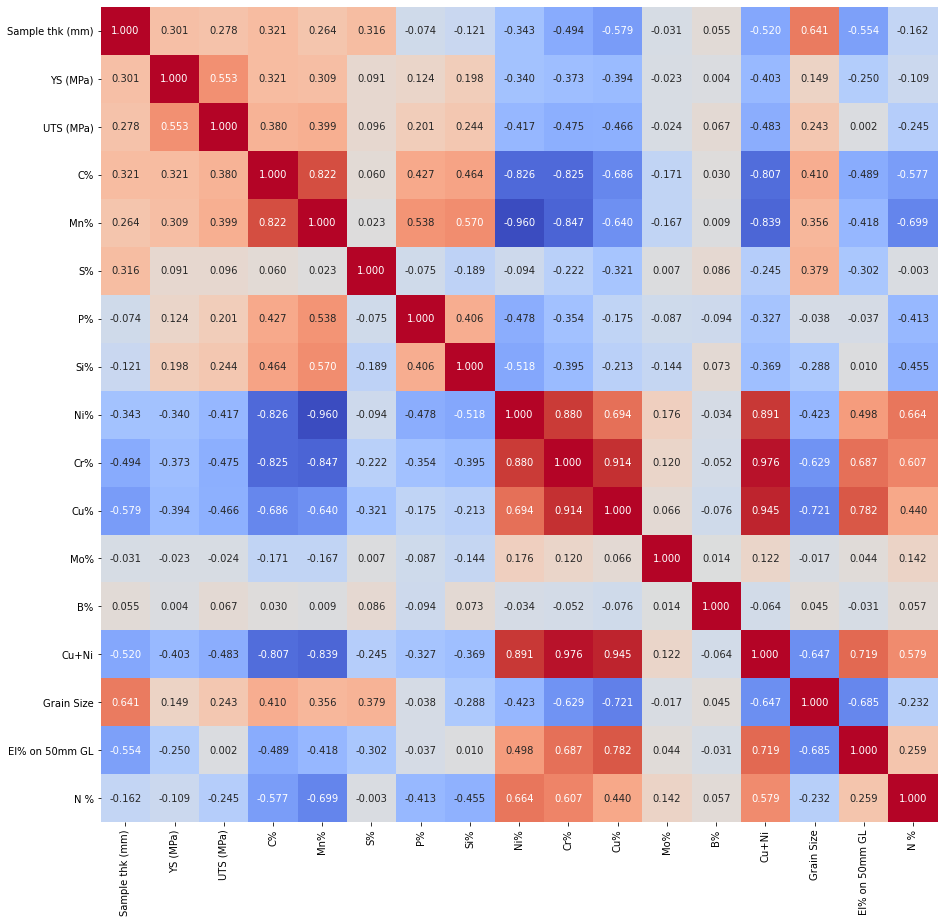

In [271]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

##### Remove elongation less than 25% as it assumed that they were recorded wrongly

In [272]:
df = df.drop(df.index[df['El% on 50mm GL'] <= 25])

In [273]:
df.all(axis=0, bool_only=None, skipna=True, level=None)

Grade               True
Sample thk (mm)     True
YS (MPa)            True
UTS (MPa)           True
C%                  True
Mn%                 True
S%                  True
P%                  True
Si%                 True
Ni%                 True
Cr%                 True
Cu%                 True
Mo%                False
B%                  True
Cu+Ni               True
Grain Size          True
El% on 50mm GL      True
N %                False
dtype: bool

In [274]:
count = (df['N %'] == 0).sum()
print('Count of zeros in Column  N: ', count)

Count of zeros in Column  N:  1


In [275]:
df = df[df['N %'] != 0]


In [276]:
df.shape

(2632, 18)

In [277]:
df.head()

,Grade,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,B%,Cu+Ni,Grain Size,El% on 50mm GL,N %
1,JT,1.34,451.0,834.0,0.112,10.08,0.006,0.060,0.32,0.42,14.46,0.50,0.09,0.0019,0.92,33,31.0,0.1580
3,JT,1.63,410.0,884.0,0.128,10.00,0.005,0.064,0.41,0.47,14.02,0.47,0.09,0.0020,0.94,33,31.0,0.1600
4,JT,1.67,437.0,903.0,0.108,10.04,0.007,0.073,0.34,0.46,14.26,0.51,0.06,0.0016,0.97,33,31.0,0.1669
6,JT,1.19,431.0,847.0,0.116,10.20,0.008,0.053,0.45,0.45,14.24,0.47,0.07,0.0015,0.92,33,29.0,0.1550
7,JT,1.31,434.0,825.0,0.115,10.08,0.008,0.068,0.31,0.52,14.43,0.46,0.08,0.0011,0.98,33,27.0,0.1550


In [278]:
df['Grain Size'] = pd.to_numeric(df['Grain Size'], downcast="float")

In [279]:
df.columns

Index(['Grade', 'Sample thk (mm)', 'YS (MPa)', 'UTS (MPa)', 'C%', 'Mn%', 'S%',
       'P%', 'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'B%', 'Cu+Ni', 'Grain Size',
       'El% on 50mm GL', 'N %'],
      dtype='object')

### Adding Noharo Equation for Md30 for analysis

In [280]:
# Noharo Equation Md =551- 462·(C + N) -9.2·Si -8.1·Mn -13.7· Cr -9.5·(Ni +Cu)-18.5·Mo - 68·Nb -1.42·(ASTM8)
# Andrew Equation MS(°C) = 539 – 423C – 30.4Mn – 17.7Ni – 12.1Cr – 7.5Mo
df['Md30']=551- 462*(df['C%']+df['N %']) -9.2*df['Si%']-8.1*df['Mn%']-13.7*df['Cr%']-9.5*(df['Ni%'] +df['Cu%'])-18.5*df['Mo%']-1.42*df['Grain Size']
df['MS']=539-423*df['C%']-30.4*df['Mn%']-17.7*df['Ni%']-12.1*df['Cr%']-7.5*df['Mo%']
df.head()

,Grade,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,B%,Cu+Ni,Grain Size,El% on 50mm GL,N %,Md30,MS
1,JT,1.34,451.0,834.0,0.112,10.08,0.006,0.060,0.32,0.42,14.46,0.50,0.09,0.0019,0.92,33.0,31.0,0.1580,86.300994,2.116977
3,JT,1.63,410.0,884.0,0.128,10.00,0.005,0.064,0.41,0.47,14.02,0.47,0.09,0.0020,0.94,33.0,31.0,0.1600,83.642995,2.219974
4,JT,1.67,437.0,903.0,0.108,10.04,0.007,0.073,0.34,0.46,14.26,0.51,0.06,0.0016,0.97,33.0,31.0,0.1669,86.997197,6.962003
6,JT,1.19,431.0,847.0,0.116,10.20,0.008,0.053,0.45,0.45,14.24,0.47,0.07,0.0015,0.92,33.0,29.0,0.1550,87.055005,-0.941977
7,JT,1.31,434.0,825.0,0.115,10.08,0.008,0.068,0.31,0.52,14.43,0.46,0.08,0.0011,0.98,33.0,27.0,0.1550,86.419005,-0.484003


In [286]:
df1=df.loc[df['Grade'] == '204CU']
df2=df.loc[df['Grade'] == 'JSLU SD']
df3=df.loc[df['Grade'] == 'JSLU DD']
df4=df.loc[df['Grade'] == 'JT']

In [287]:
df4.describe()

,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,B%,Cu+Ni,Grain Size,El% on 50mm GL,N %,Md30,MS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.0,679.000000,679.000000,679.000000,679.000000
mean,1.337953,442.715759,937.665710,0.113362,10.097775,0.006518,0.063046,0.379013,0.496495,14.318762,0.587585,0.073181,0.001659,1.084080,33.0,39.821796,0.159258,85.090777,1.481500
std,0.364989,36.890377,96.766953,0.007017,0.119497,0.001492,0.007312,0.052002,0.105455,0.164508,0.138696,0.227156,0.000399,0.202262,0.0,10.618445,0.007064,6.930941,4.639030
min,0.500000,344.000000,735.000000,0.103000,9.000000,0.002000,0.008000,0.260000,0.400000,13.250000,0.410000,0.010000,0.000800,0.850000,33.0,26.000000,0.135000,38.782006,-21.797016
25%,1.130000,419.000000,857.000000,0.110000,10.030000,0.006000,0.059000,0.340000,0.440000,14.250000,0.480000,0.040000,0.001400,0.950000,33.0,31.000000,0.155000,82.882994,-1.063002
50%,1.260000,434.000000,930.000000,0.112000,10.100000,0.007000,0.062000,0.370000,0.460000,14.320000,0.540000,0.050000,0.001600,1.070000,33.0,37.000000,0.159000,85.673816,2.168985
75%,1.515000,456.000000,1010.000000,0.115000,10.160000,0.008000,0.067000,0.410000,0.505000,14.420000,0.680000,0.070000,0.001900,1.140000,33.0,48.000000,0.164500,87.958009,4.496985
max,2.700000,607.000000,1243.000000,0.163000,10.450000,0.009000,0.090000,0.580000,0.980000,14.650000,1.360000,3.000000,0.003200,2.320000,33.0,65.000000,0.176000,107.891999,19.154001


In [288]:
df3.describe()

,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,B%,Cu+Ni,Grain Size,El% on 50mm GL,N %,Md30,MS
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.0,803.000000,803.000000,803.000000,803.000000
mean,0.705093,419.417175,832.845581,0.106042,9.927098,0.004752,0.067615,0.426351,0.703848,15.380872,1.928132,0.060697,0.001500,2.631980,25.0,60.037983,0.159511,71.637851,-6.661592
std,0.292783,18.088079,29.860540,0.004598,0.153737,0.001279,0.008079,0.052232,0.143357,0.163599,0.094260,0.030994,0.000315,0.103862,0.0,4.301176,0.006966,4.293001,4.770932
min,0.300000,364.000000,629.000000,0.095000,9.400000,0.001000,0.051000,0.310000,0.500000,15.030000,1.750000,0.010000,0.000800,2.440000,25.0,39.000000,0.144000,57.530001,-19.180004
25%,0.540000,408.000000,813.000000,0.103000,9.860000,0.004000,0.062000,0.390000,0.650000,15.280000,1.880000,0.040000,0.001200,2.570000,25.0,58.000000,0.155000,68.687497,-9.252988
50%,0.620000,418.000000,829.000000,0.105000,9.930000,0.005000,0.068000,0.420000,0.670000,15.400000,1.960000,0.050000,0.001500,2.620000,25.0,60.000000,0.159000,71.703005,-6.256009
75%,0.810000,430.000000,852.000000,0.108000,10.010000,0.006000,0.073000,0.460000,0.800000,15.500000,1.980000,0.070000,0.001700,2.670000,25.0,63.000000,0.164000,74.875606,-3.539017
max,3.170000,549.000000,945.000000,0.126000,10.300000,0.008000,0.092000,0.690000,1.150000,15.950000,2.200000,0.200000,0.002500,3.000000,25.0,70.000000,0.180000,80.583998,6.650980


In [289]:
df2.describe()

,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,B%,Cu+Ni,Grain Size,El% on 50mm GL,N %,Md30,MS
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000
mean,0.668951,449.511475,906.885254,0.111075,9.946655,0.004862,0.067466,0.549541,0.655344,14.864425,1.180393,0.060459,0.001641,1.835738,20.0,53.850819,0.160255,89.421137,-2.275829
std,0.256437,25.754930,57.804600,0.005426,0.121303,0.001187,0.008063,0.036874,0.143254,0.106942,0.028071,0.025722,0.000338,0.143347,0.0,8.662051,0.006692,4.394127,4.693814
min,0.260000,388.000000,790.000000,0.100000,9.720000,0.001000,0.040000,0.470000,0.400000,14.640000,1.140000,0.010000,0.001000,1.560000,20.0,26.000000,0.140700,74.526992,-16.895046
25%,0.520000,434.000000,864.000000,0.108000,9.850000,0.004000,0.062000,0.520000,0.540000,14.790000,1.160000,0.040000,0.001400,1.780000,20.0,50.000000,0.155200,86.147008,-5.656995
50%,0.610000,451.000000,899.000000,0.110000,9.940000,0.005000,0.066000,0.540000,0.670000,14.850000,1.180000,0.060000,0.001500,1.860000,20.0,57.000000,0.160500,89.672004,-1.732993
75%,0.730000,466.000000,938.000000,0.114000,10.000000,0.006000,0.072000,0.570000,0.730000,14.950000,1.190000,0.070000,0.001900,1.910000,20.0,60.000000,0.164500,91.996999,1.060992
max,2.050000,566.000000,1093.000000,0.129000,10.300000,0.006000,0.095000,0.690000,1.040000,15.180000,1.340000,0.150000,0.002800,2.220000,20.0,70.000000,0.188500,103.441600,7.428973


In [290]:
df1.describe()

,Sample thk (mm),YS (MPa),UTS (MPa),C%,Mn%,S%,P%,Si%,Ni%,Cr%,Cu%,Mo%,B%,Cu+Ni,Grain Size,El% on 50mm GL,N %,Md30,MS
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.0,845.000000,845.000000,845.000000,845.000000
mean,0.774722,414.795258,804.730164,0.091916,8.320236,0.005536,0.054515,0.301834,1.576734,16.187929,2.054473,0.112225,0.001571,3.631207,25.0,59.214203,0.176919,62.780060,22.560526
std,0.286204,22.249916,25.364511,0.003391,0.182969,0.001595,0.003140,0.056762,0.062105,0.099742,0.037721,0.042205,0.000882,0.071538,0.0,4.190407,0.006109,4.862162,6.862238
min,0.340000,357.000000,695.000000,0.084000,8.070000,0.002000,0.045000,0.180000,1.500000,16.010000,2.000000,0.010000,0.000700,3.520000,25.0,27.000000,0.161000,45.605205,3.383026
25%,0.590000,399.000000,789.000000,0.090000,8.170000,0.005000,0.052000,0.260000,1.530000,16.100000,2.030000,0.080000,0.001300,3.580000,25.0,57.000000,0.172000,59.699791,17.087982
50%,0.760000,412.000000,804.000000,0.092000,8.270000,0.005000,0.054000,0.290000,1.560000,16.180000,2.050000,0.110000,0.001500,3.620000,25.0,60.000000,0.176700,62.993989,23.874008
75%,0.890000,429.000000,820.000000,0.094000,8.450000,0.007000,0.057000,0.330000,1.600000,16.280001,2.080000,0.140000,0.001700,3.670000,25.0,62.000000,0.181500,66.322992,28.076010
max,3.120000,507.000000,874.000000,0.100000,8.820000,0.008000,0.060000,0.630000,1.830000,16.549999,2.180000,0.230000,0.014000,3.920000,25.0,70.000000,0.197900,72.984982,34.382988


In [ ]:
X=df[['Sample thk (mm)', 'C%', 'Mn%', 
       'P%', 'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N %']]
y=df[['YS (MPa)', 'UTS (MPa)','El% on 50mm GL']]
y1=df[['YS (MPa)']]
y2=df[['UTS (MPa)']]
y3=df[['El% on 50mm GL']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=9)


In [ ]:
train=pd.concat([X_train,y_train], axis=1)
train

In [ ]:
test=pd.concat([X_test,y_test], axis=1)
test

# <h1><center>Importing Different models for comparison</center></h1>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse


In [ ]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(random_state=2),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    "Gradient Boosting Regressor":MultiOutputRegressor(GradientBoostingRegressor()),
    
    "Xgbregressor":MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',random_state=2))
    
}

# Yield Strength

In [ ]:
# yp1 = dict()

# y_mse = dict()
# score=dict()
# score_train=dict()

# for name, estimator in ESTIMATORS.items():     
#     estimator.fit(X_train, y1_train)                    # fit() with instantiated object
    
#     yp1[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    
#     score[name]=estimator.score(X_test,y_test)
#     score_train[name]=estimator.score(X_train,ytrain)

In [ ]:
X=train[['Sample thk (mm)', 'C%', 'Mn%', 
       'P%', 'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N %']]

y1=train[['YS (MPa)']]
y2=train[['UTS (MPa)']]
y3=train[['El% on 50mm GL']]

In [ ]:
# X_train,X_test,y1_train,y1_test=train_test_split(train,y.iloc[:,0],test_size=0.1,random_state=37)
model1=RandomForestRegressor(n_estimators=100)
model1.fit(X,y1)
model1.score(X,y1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [ ]:
model2=ExtraTreesRegressor()
model2.fit(X,y2)
model2.score(X,y2)

In [ ]:
model3=ExtraTreesRegressor()
model3.fit(X,y3)
model3.score(X,y3)

In [ ]:
# X_train,X_test,y2_train,y2_test=train_test_split(X,y.iloc[:,1],test_size=0.1,random_state=26)
# model2=ExtraTreesRegressor()
# model2.fit(X_train,y2_train)
# model2.score(X_test,y2_test)

In [ ]:
# X_train,X_test,y3_train,y3_test=train_test_split(X,y.iloc[:,2],test_size=0.1,random_state=10)
# model3=RandomForestRegressor()
# model3.fit(X_train,y3_train)
# model3.score(X_test,y3_test)

In [ ]:
# log1=[]
# for i in range(0,40,1):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=i)
#     ETR1=RandomForestRegressor()
#     ETR1.fit(X_train,y_train)
#     y_et1=ETR1.predict(X_test)
#     r2=r2_score(y_test,y_et1)
#     print(r2,i)
#     log1.append(r2)

In [ ]:
# log1=[]
# for i in range(0,40,1):
#     X_train,X_test,y1_train,y1_test=train_test_split(X,y1,shuffle=True,test_size=0.1,random_state=i)
#     ETR1=xgb.XGBRegressor()
#     ETR1.fit(X_train,y1_train)
#     y_et1=ETR1.predict(X_test)
#     r2=r2_score(y1_test,y_et1)
#     print(r2,i)
#     log1.append(r2)

In [ ]:
# log1=[]
# for i in range(0,40,1):
#     X_train,X_test,y1_train,y1_test=train_test_split(X,y1,shuffle=True,test_size=0.1,random_state=i)
#     ETR1=ExtraTreesRegressor()
#     ETR1.fit(X_train,y1_train)
#     y_et1=ETR1.predict(X_test)
#     r2=r2_score(y1_test,y_et1)
#     print(r2,i)
#     log1.append(r2)

In [ ]:
# sum(log1)/len(log1)

In [ ]:
# X_train,X_test,y1_train,y1_test=train_test_split(X,y1,shuffle=True,test_size=0.1,random_state=37)

In [ ]:
# ETR=ExtraTreesRegressor(max_depth=15)
# ETR.fit(X_train,y1_train)

In [ ]:
# ETR.score(X_test,y1_test)

In [ ]:
# ETR.score(X_train,y1_train)

In [ ]:
# X_train,X_test,y2_train,y2_test=train_test_split(X,y2,shuffle=True,test_size=0.1,random_state=2)

# Yield Strength

In [ ]:
# for i in range(0,40,1):
#     X_train,X_test,y2_train,y2_test=train_test_split(X,y2,shuffle=True,test_size=0.1,random_state=i)
#     reg=ExtraTreesRegressor()
#     reg.fit(X_train,y2_train)
#     y_et2=reg.predict(X_test)
#     r2=r2_score(y2_test,y_et2)
#     print(r2,i)

In [ ]:
# for i in range(0,40,1):
#     X_train,X_test,y2_train,y2_test=train_test_split(X,y2,shuffle=True,test_size=0.1,random_state=i)
#     reg=RandomForestRegressor()
#     reg.fit(X_train,y2_train)
#     y_et2=reg.predict(X_test)
#     r2=r2_score(y2_test,y_et2)
#     print(r2,i)

# Elongation

In [ ]:
# for i in range(0,40,1):
#     X_train,X_test,y3_train,y3_test=train_test_split(X,y3,shuffle=True,test_size=0.1,random_state=i)
#     reg=RandomForestRegressor()
#     reg.fit(X_train,y3_train)
#     y_et2=reg.predict(X_test)
#     r2=r2_score(y3_test,y_et2)
#     print(r2,i)

In [ ]:
# for i in range(0,40,1):
#     X_train,X_test,y3_train,y3_test=train_test_split(X,y3,shuffle=True,test_size=0.1,random_state=i)
#     reg=ExtraTreesRegressor()
#     reg.fit(X_train,y3_train)
#     y_et2=reg.predict(X_test)
#     r2=r2_score(y3_test,y_et2)
#     print(r2,i)

In [ ]:
# for i in range(0,40,1):
#     X_train,X_test,y3_train,y3_test=train_test_split(X,y3,shuffle=True,test_size=0.1,random_state=i)
#     reg=xgb.XGBRegressor()
#     reg.fit(X_train,y3_train)
#     y_et2=reg.predict(X_test)
#     r2=r2_score(y3_test,y_et2)
#     print(r2,i)

In [ ]:
# for i in range(0,40,1):
#     X_train,X_test,y2_train,y2_test=train_test_split(X,y2,shuffle=True,test_size=0.1,random_state=i)
#     reg=xgb.XGBRegressor()
#     reg.fit(X_train,y2_train)
#     y_et2=reg.predict(X_test)
#     r2=r2_score(y2_test,y_et2)
#     print(r2,i)

In [ ]:
y.columns

In [ ]:
xtest=test[['Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%',
       'N %']]
ytest=test[['YS (MPa)', 'UTS (MPa)', 'El% on 50mm GL']]

In [ ]:

# define a class that mocks the model interface
class CombinedModel:
    def __init__(self, model1, model2,model3):
        self.model1= model1
        self.model2= model2
        self.model3= model3
        
    def predict(self, k, **kwargs):
#         arr=[self.model1.predict(X),self.model2.predict(k)]
        return pd.DataFrame({'YS':self.model1.predict(k),'UTS':self.model2.predict(k),'Elongation':self.model3.predict(k)})

# create a model with the two trained sum models
# and pickle it
model= CombinedModel(model1,model2,model3)
model.predict(xtest)

In [ ]:
yk=model.predict(xtest)

In [ ]:
yk[0:30]

In [ ]:
ytest

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest.iloc[:,0],yk.iloc[:,0])

In [ ]:
r2_score(ytest.iloc[:,1],yk.iloc[:,1])

In [ ]:
r2_score(ytest.iloc[:,2],yk.iloc[:,2])

In [ ]:
df.head()

# Xgboost

In [ ]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = MultiOutputRegressor(xgb.XGBRegressor())
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

In [ ]:
X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 34)
xgbr = MultiOutputRegressor(xgb.XGBRegressor())
xgbr.fit(X_train,y_train)

In [ ]:
y_xgbr=xgbr.predict(X_test)

In [ ]:
xgbr.score(X_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_absolute_error(y_test.iloc[:,0],y_xgbr[:,0])

In [ ]:
mean_squared_error(y_test.iloc[:,0],y_xgbr[:,0],squared=False)

In [ ]:
mean_squared_error(y_test.iloc[:,1],y_xgbr[:,1],squared=False)

In [ ]:
mean_squared_error(y_test.iloc[:,2],y_xgbr[:,2],squared=False)

In [ ]:
mean_absolute_error(y_test,y_xgbr)

In [ ]:
mean_squared_error(y_test,y_xgbr,squared=False)

In [ ]:
from sklearn.metrics import r2_score
log=[]
for i in np.arange(0.05,0.35,0.05):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, random_state = 34)
    reg = MultiOutputRegressor(xgb.XGBRegressor())
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    rr = r2_score(y_test, pred)
    mae1=mean_absolute_error(y_test.iloc[:,0],pred[:,0])
    mae2=mean_absolute_error(y_test.iloc[:,1],pred[:,1])
    mae3=mean_absolute_error(y_test.iloc[:,2],pred[:,2])
    mse1=mean_squared_error(y_test.iloc[:,0],pred[:,0],squared=False)
    mse2=mean_squared_error(y_test.iloc[:,1],pred[:,1],squared=False)
    mse3=mean_squared_error(y_test.iloc[:,2],pred[:,2],squared=False)
    rrmse1=mse1/y_test.iloc[:,0].mean()*100
    rrmse2=mse2/y_test.iloc[:,1].mean()*100
    rrmse3=mse3/y_test.iloc[:,2].mean()*100
    print(rr, i)
    log.append([i,rr,mae1,mae2,mae3,mse1,mse2,mse3,rrmse1,rrmse2,rrmse3])

In [ ]:
log=pd.DataFrame(log,columns=['test_size','r2','mae_ys','mae_uts','mae_el','mse1','mse2','mse3','rrmse1','rrmse2','rrmse3'])

In [ ]:
log

# Gradient Boosting

In [ ]:
from sklearn.metrics import r2_score
log1=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = MultiOutputRegressor(GradientBoostingRegressor())
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log1.append(rr)

In [ ]:
from sklearn.metrics import r2_score
log1=[]
for i in np.arange(0.05,0.35,0.05):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, random_state = 3)
    reg = MultiOutputRegressor(GradientBoostingRegressor())
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    rr = r2_score(y_test, pred)
    mae1=mean_absolute_error(y_test.iloc[:,0],pred[:,0])
    mae2=mean_absolute_error(y_test.iloc[:,1],pred[:,1])
    mae3=mean_absolute_error(y_test.iloc[:,2],pred[:,2])
    mse1=mean_squared_error(y_test.iloc[:,0],pred[:,0],squared=False)
    mse2=mean_squared_error(y_test.iloc[:,1],pred[:,1],squared=False)
    mse3=mean_squared_error(y_test.iloc[:,2],pred[:,2],squared=False)
    rrmse1=mse1/y_test.iloc[:,0].mean()*100
    rrmse2=mse2/y_test.iloc[:,1].mean()*100
    rrmse3=mse3/y_test.iloc[:,2].mean()*100
    print(rr, i)
    log1.append([i,rr,mae1,mae2,mae3,mse1,mse2,mse3,rrmse1,rrmse2,rrmse3])

In [ ]:
log1=pd.DataFrame(log1,columns=['test_size','r2','mae_ys','mae_uts','mae_el','mse1','mse2','mse3','rrmse1','rrmse2','rrmse3'])
log1

# RandomForest

In [ ]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = RandomForestRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log2.append(rr)

In [ ]:
max(log2)

In [ ]:
from sklearn.metrics import r2_score
log2=[]
for i in np.arange(0.05,0.35,0.05):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, random_state = 10)
    reg =RandomForestRegressor()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    rr = r2_score(y_test, pred)
    mae1=mean_absolute_error(y_test.iloc[:,0],pred[:,0])
    mae2=mean_absolute_error(y_test.iloc[:,1],pred[:,1])
    mae3=mean_absolute_error(y_test.iloc[:,2],pred[:,2])
    mse1=mean_squared_error(y_test.iloc[:,0],pred[:,0],squared=False)
    mse2=mean_squared_error(y_test.iloc[:,1],pred[:,1],squared=False)
    mse3=mean_squared_error(y_test.iloc[:,2],pred[:,2],squared=False)
    rrmse1=mse1/y_test.iloc[:,0].mean()*100
    rrmse2=mse2/y_test.iloc[:,1].mean()*100
    rrmse3=mse3/y_test.iloc[:,2].mean()*100
    print(rr, i)
    log2.append([i,rr,mae1,mae2,mae3,mse1,mse2,mse3,rrmse1,rrmse2,rrmse3])

In [ ]:
log2=pd.DataFrame(log2,columns=['test_size','r2','mae_ys','mae_uts','mae_el','mse1','mse2','mse3','rrmse1','rrmse2','rrmse3'])
log2

# Extra Tree Regressor

In [ ]:
from sklearn.metrics import r2_score
log3=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    etr = ExtraTreesRegressor()
    etr.fit(X_train,y_train)
    pred = etr.predict(X_test)
    rr = r2_score(y_test, pred)
    print(rr, i)
    log3.append(rr)

In [ ]:
from sklearn.metrics import r2_score
log3=[]
for i in np.arange(0.05,0.35,0.05):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, random_state = 9)
    reg =ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    rr = r2_score(y_test, pred)
    mae1=mean_absolute_error(y_test.iloc[:,0],pred[:,0])
    mae2=mean_absolute_error(y_test.iloc[:,1],pred[:,1])
    mae3=mean_absolute_error(y_test.iloc[:,2],pred[:,2])
    mse1=mean_squared_error(y_test.iloc[:,0],pred[:,0],squared=False)
    mse2=mean_squared_error(y_test.iloc[:,1],pred[:,1],squared=False)
    mse3=mean_squared_error(y_test.iloc[:,2],pred[:,2],squared=False)
    rrmse1=mse1/y_test.iloc[:,0].mean()*100
    rrmse2=mse2/y_test.iloc[:,1].mean()*100
    rrmse3=mse3/y_test.iloc[:,2].mean()*100
    print(rr, i)
    log3.append([i,rr,mae1,mae2,mae3,mse1,mse2,mse3,rrmse1,rrmse2,rrmse3])

In [ ]:
log3=pd.DataFrame(log3,columns=['test_size','r2','mae_ys','mae_uts','mae_el','mse1','mse2','mse3','rrmse1','rrmse2','rrmse3'])
log3

# Decision Trees

In [ ]:
from sklearn.metrics import r2_score
log4=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(X_train,y_train)
    pred = DTR.predict(X_test)
    rr = r2_score(y_test, pred)
    print(rr, i)
    log4.append(rr)

In [ ]:
from sklearn.metrics import r2_score
log4=[]
for i in np.arange(0.05,0.35,0.05):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, random_state = 26)
    reg =DecisionTreeRegressor()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    rr = r2_score(y_test, pred)
    mae1=mean_absolute_error(y_test.iloc[:,0],pred[:,0])
    mae2=mean_absolute_error(y_test.iloc[:,1],pred[:,1])
    mae3=mean_absolute_error(y_test.iloc[:,2],pred[:,2])
    mse1=mean_squared_error(y_test.iloc[:,0],pred[:,0],squared=False)
    mse2=mean_squared_error(y_test.iloc[:,1],pred[:,1],squared=False)
    mse3=mean_squared_error(y_test.iloc[:,2],pred[:,2],squared=False)
    rrmse1=mse1/y_test.iloc[:,0].mean()*100
    rrmse2=mse2/y_test.iloc[:,1].mean()*100
    rrmse3=mse3/y_test.iloc[:,2].mean()*100
    print(rr, i)
    log4.append([i,rr,mae1,mae2,mae3,mse1,mse2,mse3,rrmse1,rrmse2,rrmse3])

In [ ]:
log4=pd.DataFrame(log4,columns=['test_size','r2','mae_ys','mae_uts','mae_el','mse1','mse2','mse3','rrmse1','rrmse2','rrmse3'])
log4

# KNN 

In [ ]:
from sklearn.metrics import r2_score
log5=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    KNN = KNeighborsRegressor()
    KNN.fit(X_train,y_train)
    pred = KNN.predict(X_test)
    rr = r2_score(y_test, pred)
    print(rr, i)
    log5.append(rr)

In [ ]:
from sklearn.metrics import r2_score
log5=[]
for i in np.arange(0.05,0.35,0.05):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, random_state = 29)
    reg =KNeighborsRegressor()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    rr = r2_score(y_test, pred)
    mae1=mean_absolute_error(y_test.iloc[:,0],pred[:,0])
    mae2=mean_absolute_error(y_test.iloc[:,1],pred[:,1])
    mae3=mean_absolute_error(y_test.iloc[:,2],pred[:,2])
    mse1=mean_squared_error(y_test.iloc[:,0],pred[:,0],squared=False)
    mse2=mean_squared_error(y_test.iloc[:,1],pred[:,1],squared=False)
    mse3=mean_squared_error(y_test.iloc[:,2],pred[:,2],squared=False)
    rrmse1=mse1/y_test.iloc[:,0].mean()*100
    rrmse2=mse2/y_test.iloc[:,1].mean()*100
    rrmse3=mse3/y_test.iloc[:,2].mean()*100
    print(rr, i)
    log5.append([i,rr,mae1,mae2,mae3,mse1,mse2,mse3,rrmse1,rrmse2,rrmse3])

In [ ]:
log5=pd.DataFrame(log5,columns=['test_size','r2','mae_ys','mae_uts','mae_el','mse1','mse2','mse3','rrmse1','rrmse2','rrmse3'])
log5

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['r2'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['r2'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['r2'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['r2'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
# plt.plot(log1['test_size'],log4['r2'],   marker="o",markersize=10, markeredgewidth=1.5,label='DT')
plt.plot(log1['test_size'],log5['r2'],   marker="o",markersize=10, markeredgewidth=1.5,label='KNN')
plt.xlabel('Test Size',fontsize=15)
plt.ylabel('R2 score',fontsize=15)
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['mae_ys'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['mae_ys'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['mae_ys'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['mae_ys'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
# plt.plot(log4['test_size'],log4['mae_ys'],   marker="o",markersize=10, markeredgewidth=1.5,label='DT')
plt.plot(log5['test_size'],log5['mae_ys'],   marker="o",markersize=10, markeredgewidth=1.5,label='KNN')
plt.xlabel('Test Size',fontsize=15)
plt.ylabel('Mean Absolute Error',fontsize=15)
plt.title('Yield Strength',fontsize=15)
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['mae_uts'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['mae_uts'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['mae_uts'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['mae_uts'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
# plt.plot(log4['test_size'],log4['mae_uts'],   marker="o",markersize=10, markeredgewidth=1.5,label='DT')
plt.plot(log5['test_size'],log5['mae_uts'],   marker="o",markersize=10, markeredgewidth=1.5,label='KNN')
plt.xlabel('Test Size',fontsize=15)
plt.ylabel('Mean Absolute Error',fontsize=15)
plt.title('Ultimate Tensile Strength',fontsize=15)
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['mae_el'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['mae_el'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['mae_el'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['mae_el'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.plot(log5['test_size'],log5['mae_el'],   marker="o",markersize=10, markeredgewidth=1.5,label='KNN')
plt.title('Elongation',fontsize=15)
plt.xlabel('Test Size',fontsize=15)
plt.ylabel('Mean Absolute Error',fontsize=15)
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['mse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['mse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['mse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['mse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['mse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['mse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['mse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['mse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['mse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['mse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['mse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['mse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['rrmse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['rrmse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['rrmse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['rrmse1'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['rrmse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['rrmse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['rrmse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['rrmse2'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.plot(log3['test_size'],log3['rrmse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='ETR')
plt.plot(log2['test_size'],log2['rrmse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='RF')
plt.plot(log['test_size'],log['rrmse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='XGBR')
plt.plot(log1['test_size'],log1['rrmse3'],   marker="o",markersize=10, markeredgewidth=1.5,label='GBR')
plt.legend()